## Data Loading and Initialization

### Import Libraries

In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

This project utilises Pandas for data manipulation and analysis, and employs Matplotlib, Seaborn, and Squarify for data visualisation.

In [ ]:
!pip install pandas matplotlib seaborn squarify

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

### Load Datasets

The project uses three datasets: two sourced from Kaggle that provide data on movies and TV shows, and a third dataset on subscription plans that I collected independently.

In [4]:
movies_data = pd.read_csv('Data/movies_data.csv')
movies_data.head()

Unnamed: 0  ID                                     Title  Year  Age  \
0           0   1                              The Irishman  2019  18+   
1           1   2                                    Dangal  2016   7+   
2           2   3  David Attenborough: A Life on Our Planet  2020   7+   
3           3   4         Lagaan: Once Upon a Time in India  2001   7+   
4           4   5                                      Roma  2018  18+   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
0          98/100        1     0            0        0     0  
1          97/100        1     0            0        0     0  
2          95/100        1     0            0        0     0  
3          94/100        1     0            0        0     0  
4          94/100        1     0            0        0     0

In [5]:
tv_shows = pd.read_csv('Data/tv_shows.csv')
tv_shows.head()

Unnamed: 0  ID             Title  Year  Age    IMDb Rotten Tomatoes  \
0           0   1      Breaking Bad  2008  18+  9.4/10         100/100   
1           1   2   Stranger Things  2016  16+  8.7/10          96/100   
2           2   3   Attack on Titan  2013  18+  9.0/10          95/100   
3           3   4  Better Call Saul  2015  18+  8.8/10          94/100   
4           4   5              Dark  2017  16+  8.8/10          93/100   

   Netflix  Hulu  Prime Video  Disney+  Type  
0        1     0            0        0     1  
1        1     0            0        0     1  
2        1     1            0        0     1  
3        1     0            0        0     1  
4        1     0            0        0     1

In [6]:
svod_ad_plans = pd.read_csv('Data/svod_ad_plans.csv')
svod_ad_plans

SN     Platform          Plan Name Ad-Supported Resolution  \
0   1      Disney+              Basic          Yes      1080p   
1   2         Hulu    Hulu (With Ads)          Yes      1080p   
2   3      Netflix  Standard with ads          Yes      1080p   
3   4  Prime Video        Prime Video          Yes      1080p   

   Devices Supported Download Support Price (US$)  
0                  2               No       $7.99  
1                  2               No       $7.99  
2                  2              Yes       $6.99  
3                  2              Yes       $8.99

**Note:** The data collected for subscription plans include only the most basic and cost-effective options from each platform, deliberately omitting bundled packages, special offers, and additional perks to ensure a uniform and objective comparison.

## Data Cleaning and Standardization

### Create New Column: Platform

For the purpose of simplifying the analysis of show availability, I'm creating a new 'Platform' column by combining the existing platform columns and filtering for shows that are available on each platform.

In [7]:
movies_streaming = (
    movies_data[['Title', 'Netflix', 'Hulu', 'Disney+', 'Prime Video']]
    # Transform the DataFrame from wide to long format
    .melt(id_vars=['Title'], var_name='Platform', value_name='Available')
    # Filter rows where 'Available' is 1 (i.e., the show is available on the platform)
    .query("Available == 1")
    # Drop the 'Available' column as it's no longer needed
    .drop(columns=['Available'])
)
movies_streaming.head()

Title Platform
0                              The Irishman  Netflix
1                                    Dangal  Netflix
2  David Attenborough: A Life on Our Planet  Netflix
3         Lagaan: Once Upon a Time in India  Netflix
4                                      Roma  Netflix

In [8]:
# Merge the movies_streaming DataFrame with the movies_data DataFrame on 'Title' to combine streaming availability with other details
movies_expanded = movies_streaming.merge(movies_data, on='Title', how='inner')
# Drop the streaming platform columns as they are no longer needed after the merge
movies_expanded.drop(columns=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], inplace=True)
movies_expanded.head()

Title Platform  Unnamed: 0  ID  Year  \
0                              The Irishman  Netflix           0   1  2019   
1                                    Dangal  Netflix           1   2  2016   
2  David Attenborough: A Life on Our Planet  Netflix           2   3  2020   
3         Lagaan: Once Upon a Time in India  Netflix           3   4  2001   
4                                      Roma  Netflix           4   5  2018   

   Age Rotten Tomatoes  Type  
0  18+          98/100     0  
1   7+          97/100     0  
2   7+          95/100     0  
3   7+          94/100     0  
4  18+          94/100     0

In [9]:
tv_shows_streaming = (
    tv_shows[['Title', 'Netflix', 'Hulu', 'Disney+', 'Prime Video']]
    # Transform the DataFrame from wide to long format
    .melt(id_vars=['Title'], var_name='Platform', value_name='Available')
    # Filter rows where 'Available' is 1 (i.e., the show is available on the platform)
    .query("Available == 1")
    # Drop the 'Available' column as it's no longer needed
    .drop(columns=['Available'])
)

tv_shows_streaming.head()

Title Platform
0      Breaking Bad  Netflix
1   Stranger Things  Netflix
2   Attack on Titan  Netflix
3  Better Call Saul  Netflix
4              Dark  Netflix

In [10]:
# Merge the tv_shows_streaming DataFrame with the tv_shows DataFrame on 'Title' to combine streaming availability with other details
tv_shows_expanded = tv_shows_streaming.merge(tv_shows, on='Title', how='inner')
# Drop the streaming platform columns as they are no longer needed after the merge
tv_shows_expanded.drop(columns=['Netflix', 'Hulu', 'Prime Video', 'Disney+'], inplace=True)
tv_shows_expanded.head()

Title Platform  Unnamed: 0  ID  Year  Age    IMDb  \
0      Breaking Bad  Netflix           0   1  2008  18+  9.4/10   
1   Stranger Things  Netflix           1   2  2016  16+  8.7/10   
2   Attack on Titan  Netflix           2   3  2013  18+  9.0/10   
3  Better Call Saul  Netflix           3   4  2015  18+  8.8/10   
4              Dark  Netflix           4   5  2017  16+  8.8/10   

  Rotten Tomatoes  Type  
0         100/100     1  
1          96/100     1  
2          95/100     1  
3          94/100     1  
4          93/100     1

### Create New Column: Maturity Rating

While the dataset provides age ratings, using standardized maturity ratings (like PG, PG-13, R) would offer a more consistent and universally recognized way to categorize content. To streamline the analysis, I'll next convert the age ratings to corresponding maturity ratings.

In [11]:
movies_expanded['Age'].unique()

array(['18+', '7+', '13+', '16+', 'all', nan], dtype=object)

In [12]:
tv_shows_expanded['Age'].unique()

array(['18+', '16+', '7+', 'all', nan, '13+'], dtype=object)

First, I'll create a function called "assign_rating" that maps age ratings to MPAA film ratings.

In [13]:
def assign_rating(age):
  if age in ['18+', '16+']:
    return 'R'
  elif age == '13+':
    return 'PG-13'
  elif age == '7+':
    return 'PG'
  elif age == 'all':
    return 'G'
  else:
    return 'N/A'

**Note:** The MPAA film rating system is based on several factors, including violence, language, sexual content, drug use, and other potentially offensive material. This function provides an approximate mapping based on age, but it's important to note that the actual rating may vary depending on the specific content.

Next, I'm going to create a new column "Maturity Rating" for both dataframes and apply the assign_rating function to assign the ratings.

In [14]:
movies_expanded['Maturity Rating'] = movies_expanded['Age'].apply(assign_rating)
movies_expanded.head()

Title Platform  Unnamed: 0  ID  Year  \
0                              The Irishman  Netflix           0   1  2019   
1                                    Dangal  Netflix           1   2  2016   
2  David Attenborough: A Life on Our Planet  Netflix           2   3  2020   
3         Lagaan: Once Upon a Time in India  Netflix           3   4  2001   
4                                      Roma  Netflix           4   5  2018   

   Age Rotten Tomatoes  Type Maturity Rating  
0  18+          98/100     0               R  
1   7+          97/100     0              PG  
2   7+          95/100     0              PG  
3   7+          94/100     0              PG  
4  18+          94/100     0               R

In [15]:
tv_shows_expanded['Maturity Rating'] = tv_shows_expanded['Age'].apply(assign_rating)
tv_shows_expanded.head()

Title Platform  Unnamed: 0  ID  Year  Age    IMDb  \
0      Breaking Bad  Netflix           0   1  2008  18+  9.4/10   
1   Stranger Things  Netflix           1   2  2016  16+  8.7/10   
2   Attack on Titan  Netflix           2   3  2013  18+  9.0/10   
3  Better Call Saul  Netflix           3   4  2015  18+  8.8/10   
4              Dark  Netflix           4   5  2017  16+  8.8/10   

  Rotten Tomatoes  Type Maturity Rating  
0         100/100     1               R  
1          96/100     1               R  
2          95/100     1               R  
3          94/100     1               R  
4          93/100     1               R

### Handle Missing Data

In [16]:
movies_expanded.isnull().sum()

Title                 0
Platform              0
Unnamed: 0            0
ID                    0
Year                  0
Age                4271
Rotten Tomatoes       7
Type                  0
Maturity Rating       0
dtype: int64

In [17]:
movies_expanded['Age'] = movies_expanded['Age'].fillna('N/A')
movies_expanded['Rotten Tomatoes'] = movies_expanded['Rotten Tomatoes'].fillna(0)

In [18]:
tv_shows_expanded.isnull().sum()

Title                 0
Platform              0
Unnamed: 0            0
ID                    0
Year                  0
Age                2192
IMDb                984
Rotten Tomatoes       0
Type                  0
Maturity Rating       0
dtype: int64

In [19]:
tv_shows_expanded['Age'] = tv_shows_expanded['Age'].fillna('N/A')
tv_shows_expanded['IMDb'] = tv_shows_expanded['IMDb'].fillna('N/A')

### Standardize Rating Data

In [20]:
# Extract the numerical part of Rotten Tomatoes ratings, which are formatted as 'x/100'
movies_expanded['Rotten Tomatoes'] = movies_expanded['Rotten Tomatoes'].str.split('/').str[0]
movies_expanded['Rotten Tomatoes'] = pd.to_numeric(movies_expanded['Rotten Tomatoes'], errors='coerce')
movies_expanded.head()

Title Platform  Unnamed: 0  ID  Year  \
0                              The Irishman  Netflix           0   1  2019   
1                                    Dangal  Netflix           1   2  2016   
2  David Attenborough: A Life on Our Planet  Netflix           2   3  2020   
3         Lagaan: Once Upon a Time in India  Netflix           3   4  2001   
4                                      Roma  Netflix           4   5  2018   

   Age  Rotten Tomatoes  Type Maturity Rating  
0  18+             98.0     0               R  
1   7+             97.0     0              PG  
2   7+             95.0     0              PG  
3   7+             94.0     0              PG  
4  18+             94.0     0               R

In [21]:
# Extract the numerical part of Rotten Tomatoes ratings, which are formatted as 'x/100'
tv_shows_expanded['Rotten Tomatoes'] = tv_shows_expanded['Rotten Tomatoes'].str.split('/').str[0]
tv_shows_expanded['Rotten Tomatoes'] = pd.to_numeric(tv_shows_expanded['Rotten Tomatoes'], errors='coerce')
tv_shows_expanded.head()

Title Platform  Unnamed: 0  ID  Year  Age    IMDb  \
0      Breaking Bad  Netflix           0   1  2008  18+  9.4/10   
1   Stranger Things  Netflix           1   2  2016  16+  8.7/10   
2   Attack on Titan  Netflix           2   3  2013  18+  9.0/10   
3  Better Call Saul  Netflix           3   4  2015  18+  8.8/10   
4              Dark  Netflix           4   5  2017  16+  8.8/10   

   Rotten Tomatoes  Type Maturity Rating  
0              100     1               R  
1               96     1               R  
2               95     1               R  
3               94     1               R  
4               93     1               R

In [22]:
# Extract the numerical part of IMDb ratings, which are formatted as 'x/10'
tv_shows_expanded['IMDb'] = tv_shows_expanded['IMDb'].str.split('/').str[0]
tv_shows_expanded['IMDb'] = pd.to_numeric(tv_shows_expanded['IMDb'], errors='coerce')
tv_shows_expanded.head()

Title Platform  Unnamed: 0  ID  Year  Age  IMDb  \
0      Breaking Bad  Netflix           0   1  2008  18+   9.4   
1   Stranger Things  Netflix           1   2  2016  16+   8.7   
2   Attack on Titan  Netflix           2   3  2013  18+   9.0   
3  Better Call Saul  Netflix           3   4  2015  18+   8.8   
4              Dark  Netflix           4   5  2017  16+   8.8   

   Rotten Tomatoes  Type Maturity Rating  
0              100     1               R  
1               96     1               R  
2               95     1               R  
3               94     1               R  
4               93     1               R

### Optimize Dataset Structure

In [23]:
movies_expanded = movies_expanded[['Title', 'Platform', 'Year', 'Age', 'Maturity Rating', 'Rotten Tomatoes']]
movies_expanded.head()

Title Platform  Year  Age  \
0                              The Irishman  Netflix  2019  18+   
1                                    Dangal  Netflix  2016   7+   
2  David Attenborough: A Life on Our Planet  Netflix  2020   7+   
3         Lagaan: Once Upon a Time in India  Netflix  2001   7+   
4                                      Roma  Netflix  2018  18+   

  Maturity Rating  Rotten Tomatoes  
0               R             98.0  
1              PG             97.0  
2              PG             95.0  
3              PG             94.0  
4               R             94.0

In [24]:
tv_shows_expanded = tv_shows_expanded[['Title', 'Platform', 'Year', 'Age', 'Maturity Rating', 'IMDb', 'Rotten Tomatoes']]
tv_shows_expanded.head()

Title Platform  Year  Age Maturity Rating  IMDb  Rotten Tomatoes
0      Breaking Bad  Netflix  2008  18+               R   9.4              100
1   Stranger Things  Netflix  2016  16+               R   8.7               96
2   Attack on Titan  Netflix  2013  18+               R   9.0               95
3  Better Call Saul  Netflix  2015  18+               R   8.8               94
4              Dark  Netflix  2017  16+               R   8.8               93

## Exploratory Data Analysis

### Content Quantity Analysis

In this section, I'll delve into the quantitative aspects of content offerings, comparing the total number of TV shows and movies on each platform.

In [25]:
movies_expanded['Platform'].value_counts()

Platform
Prime Video    4113
Netflix        3695
Hulu           1047
Disney+         922
Name: count, dtype: int64

In [26]:
tv_shows_expanded['Platform'].value_counts()

Platform
Netflix        1971
Prime Video    1831
Hulu           1621
Disney+         351
Name: count, dtype: int64

In [27]:
total_content = pd.concat([tv_shows_expanded, movies_expanded])
total_content['Platform'].value_counts()

Platform
Prime Video    5944
Netflix        5666
Hulu           2668
Disney+        1273
Name: count, dtype: int64

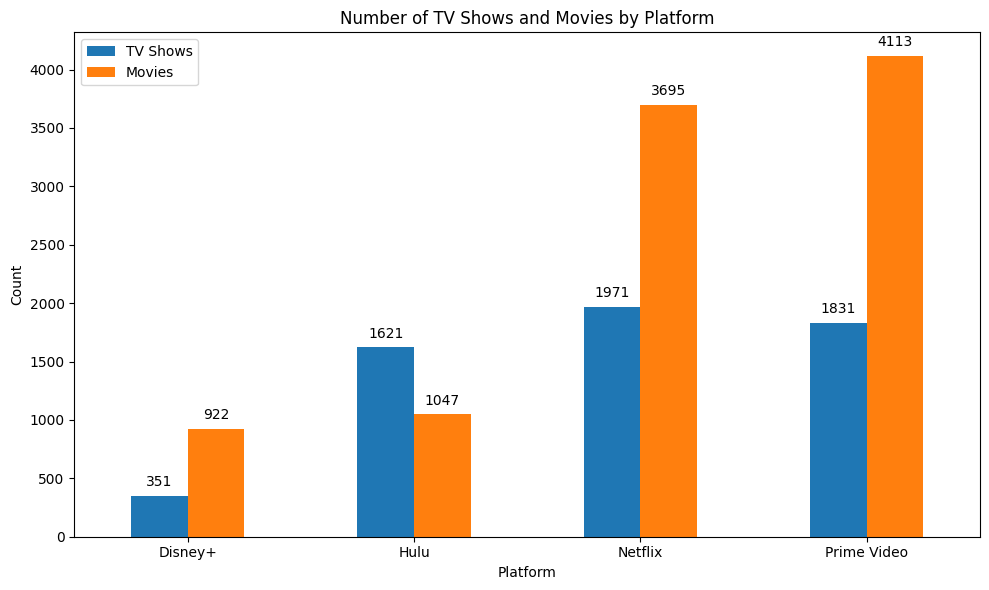

In [28]:
tv_counts = tv_shows_expanded['Platform'].value_counts()
movie_counts = movies_expanded['Platform'].value_counts()

combined_counts = pd.DataFrame({
    'TV Shows': tv_counts,
    'Movies': movie_counts
}).fillna(0)

ax = combined_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of TV Shows and Movies by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend()

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Prime Video dominates the streaming market with the highest combined number of TV shows and movies, offering a total of 5,944 items. The platform also boasts the largest movie library, featuring 4,113 films. Its vast collection of movie titles appeals to film enthusiasts and highlights its competitive stance in the streaming landscape.

Netflix comes in a close second, offering a total of 5,666 items, which includes 1,971 TV shows and 3,695 movies. While Netflix maintains a diverse content library, its strength lies in its extensive movie collection.

Hulu's content library consists of 2,668 items, including 1,621 TV shows and 1,047 movies. It offers a balanced mix of TV shows and movies but leans more towards episodic content. This could indicate Hulu’s strategy to cater to viewers who prefer episodic content. However, there is a significant gap in overall content quantity compared to Netflix and Prime Video.

Disney+ offers a total of 1,273 items, consisting of 351 TV shows and 922 movies. While it provides a strong selection of movies, its content library is the smallest compared to its competitors.